# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


for x in cities:
    full_url = url + '&q=' + x + "&appid=" + weather_api_key + "&units=" + "Metric"
    requests.get(full_url)
    response = requests.get(full_url).json() 
    city_data.append(response)
    
for x in city_data:
    if len(x) < 3:
       city_data.remove(x)
       
city_info= []

for x in city_data:
    city = x['name']
    city_lat = x['coord']['lat']
    city_lat = x['coord']['lat']
    city_lng =x['coord']['lon']
    city_max_temp = x['main']['temp_max']
    city_humidity = x['main']['humidity']
    city_clouds = x['clouds']['all']
    city_wind = x['wind']['speed']
    city_country = x['sys']['country']
    city_date =x['dt']

        # Append the City information into city_data list
    city_info.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_info)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oqtosh,39.9214,65.9253,19.34,48,0,4.31,UZ,1715487148
1,Port Alfred,-33.5906,26.8910,13.54,82,4,5.23,ZA,1715487149
2,Kerikeri,-35.2268,173.9474,17.17,61,50,1.34,NZ,1715487150
3,Mahina,-17.5065,-149.4890,28.87,65,0,1.54,PF,1715487019
4,Tofol,5.3248,163.0078,29.88,79,75,6.17,FM,1715487152


In [79]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%d/%m/%y')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Oqtosh,39.9214,65.9253,19.34,48,0,4.31,UZ,12/05/24
1,Port Alfred,-33.5906,26.8910,13.54,82,4,5.23,ZA,12/05/24
2,Kerikeri,-35.2268,173.9474,17.17,61,50,1.34,NZ,12/05/24
3,Mahina,-17.5065,-149.4890,28.87,65,0,1.54,PF,12/05/24
4,Tofol,5.3248,163.0078,29.88,79,75,6.17,FM,12/05/24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

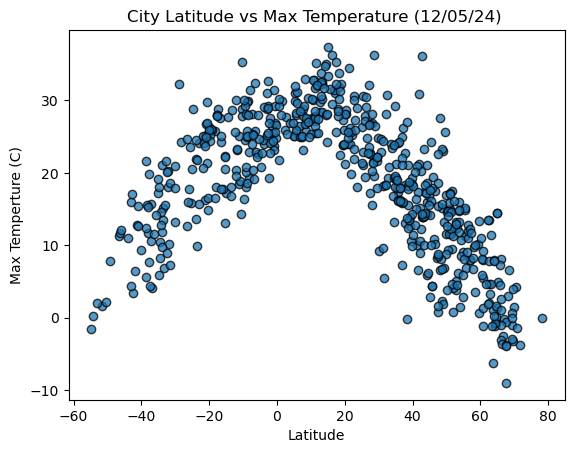

In [81]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(lat,temp,edgecolors = 'black',alpha = .75)
plt.title(f"City Latitude vs Max Temperature ({city_data_df.iloc[0,8]}) ")
plt.xlabel('Latitude')
plt.ylabel('Max Temperture (C)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

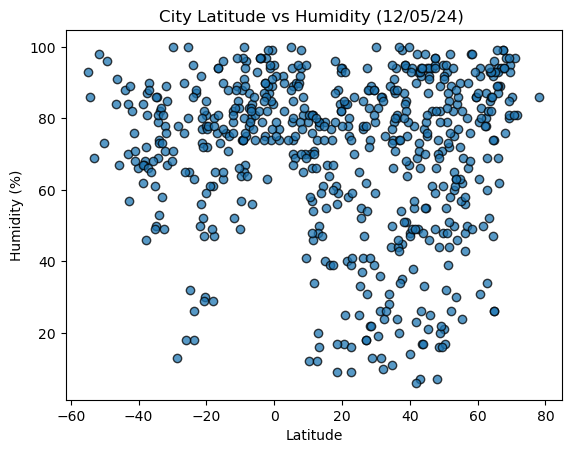

In [82]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
hum = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(lat,hum,edgecolors = 'black',alpha = .75)
plt.title(f"City Latitude vs Humidity ({city_data_df.iloc[0,8]}) ")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

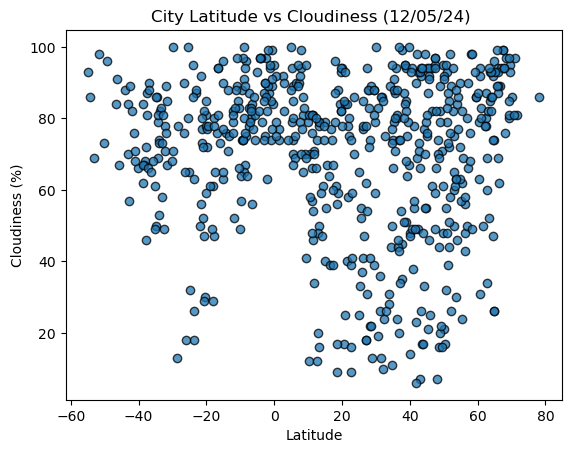

In [83]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat,hum,edgecolors = 'black',alpha = .75)
plt.title(f"City Latitude vs Cloudiness ({city_data_df.iloc[0,8]}) ")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

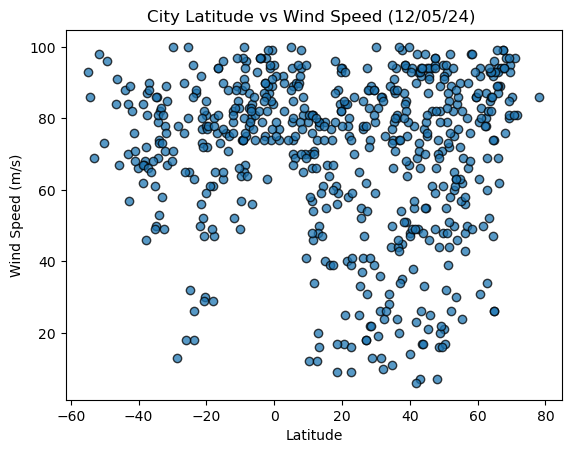

In [84]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
cloud = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(lat,hum,edgecolors = 'black',alpha = .75)
plt.title(f"City Latitude vs Wind Speed ({city_data_df.iloc[0,8]}) ")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [85]:
linregress(lat,cloud)

LinregressResult(slope=0.006209892417392858, intercept=3.3563828689782063, rvalue=0.08361796932464709, pvalue=0.04010526685000376, stderr=0.003018725374258507, intercept_stderr=0.11271820511549303)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
def Line_Regress(x,y,a,b,xlabel,ylabel):
    line = linregress(x,y)
    slope = line[0] 
    b = line[1] 
    r = line[2]

    text = (f"y = {round(slope,2)}x + {round(b,2)}")

    y_pred = slope * x + b
    plt.scatter(x,y)
    plt.plot(x, y_pred, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.text(a,b,text, fontsize = 17, color= 'red')
    print(f"The r-value is: {r}")
    plt.show()


In [87]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Oqtosh,39.9214,65.9253,19.34,48,0,4.31,UZ,12/05/24
4,Tofol,5.3248,163.0078,29.88,79,75,6.17,FM,12/05/24
5,Vorgashor,67.5833,63.9500,-9.00,99,97,2.35,RU,12/05/24
6,Al Hillah,32.4801,44.4353,30.76,24,43,7.44,IQ,12/05/24
10,Mana,5.6592,-53.7767,25.63,89,100,3.53,GF,12/05/24


In [88]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Port Alfred,-33.5906,26.8910,13.54,82,4,5.23,ZA,12/05/24
2,Kerikeri,-35.2268,173.9474,17.17,61,50,1.34,NZ,12/05/24
3,Mahina,-17.5065,-149.4890,28.87,65,0,1.54,PF,12/05/24
7,Edinburgh of the Seven Seas,-37.0676,-12.3116,15.72,90,100,6.49,SH,12/05/24
8,Grand Gaube,-20.0064,57.6608,26.32,81,30,4.02,MU,12/05/24


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8615193453823905


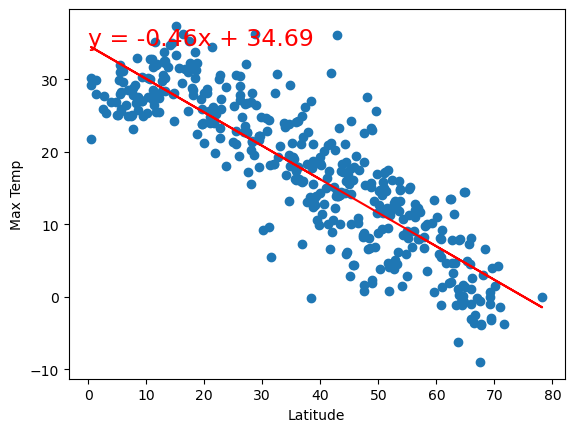

In [89]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
Line_Regress(x, y, 0,0,"Latitude","Max Temp")


The r-value is: 0.7631249373300477


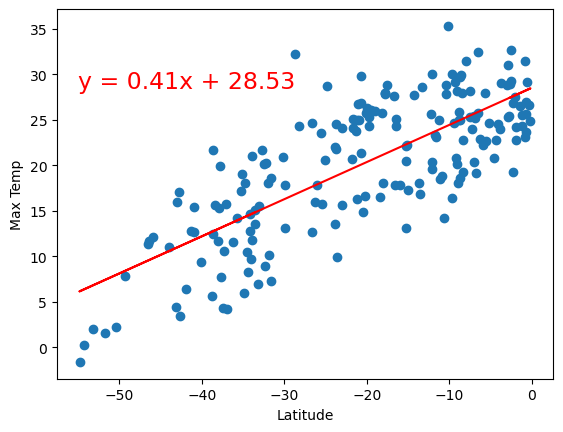

In [90]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
Line_Regress(x, y,-55,0,"Latitude","Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09397342043805627


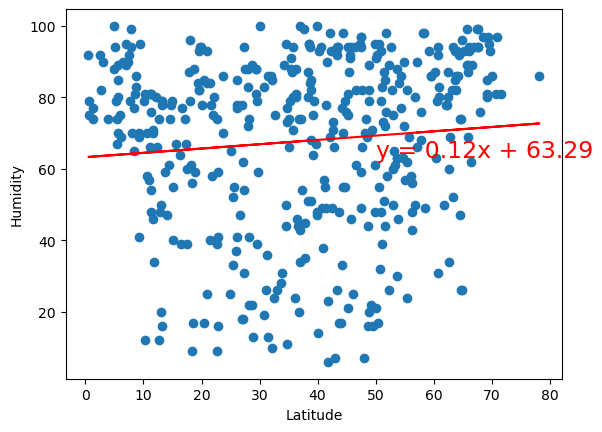

In [91]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
Line_Regress(x, y,50,0,"Latitude","Humidity")

The r-value is: 0.19212160983067111


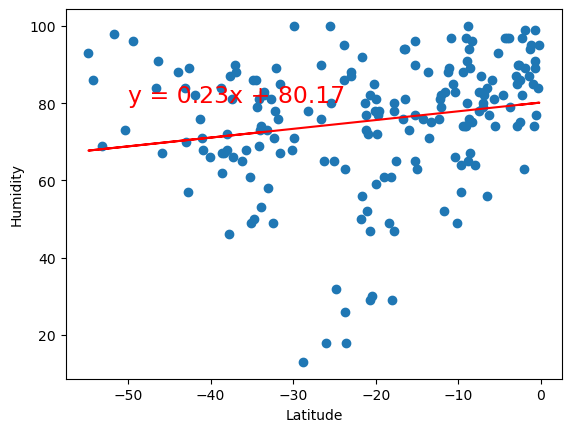

In [92]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
Line_Regress(x, y,-50,50,"Latitude","Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13757351884521618


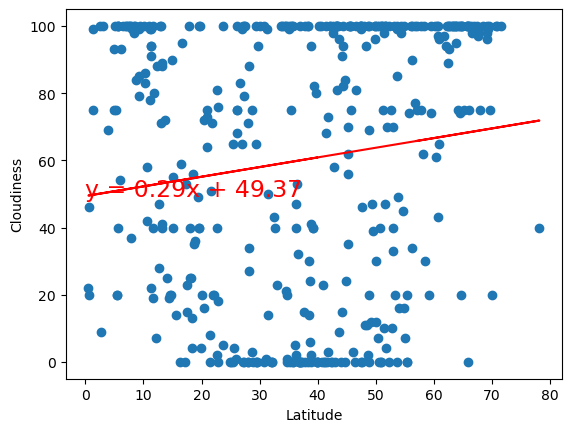

In [93]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
Line_Regress(x, y,0,0,"Latitude","Cloudiness")

The r-value is: 0.1656845232299414


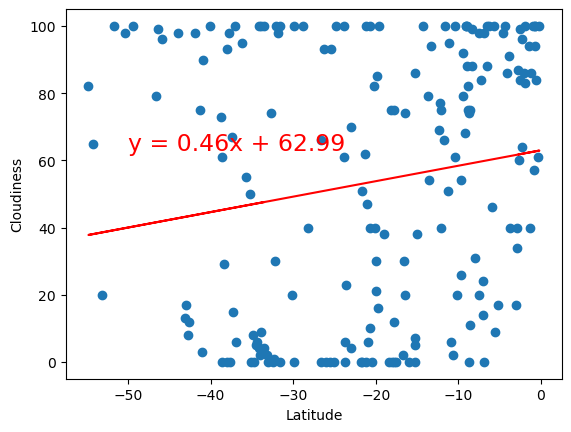

In [94]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
Line_Regress(x, y,-50,0,"Latitude","Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.039652353699361355


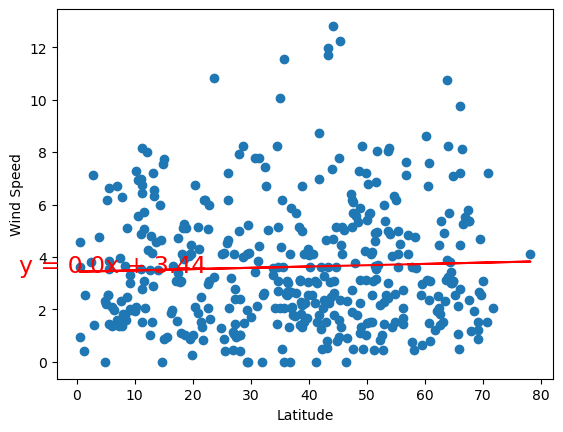

In [95]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
Line_Regress(x, y,-10,20,"Latitude","Wind Speed")

The r-value is: -0.06849476857255632


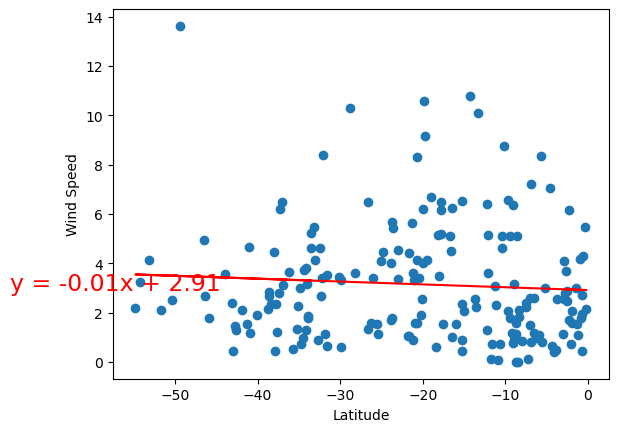

In [96]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
Line_Regress(x, y,-70,10,"Latitude","Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [97]:
# Looking at the linear graphs, there are lower temperatures, higher humidity, and higher cloudiness in the northern hemisphere.